# Neural Network Classification for predicting poverty in CA
Summary: Using neural network classification, the model predicts poverty in California. The dataset is comprised of diverse factors such as traffic, hazardous waste, low birth weight, education, etc. Using diverse EDA and several dense layer with drop out, the model's performance in f1 score is 0.85.

# 1. Read Data and Import Modules
https://oehha.ca.gov/media/downloads/calenviroscreen/document/calenviroscreen40resultsdatadictionaryf2021.zip

Download the data using gdown, read the Excel file using pandas, print the first 10 rows using df.head() and use df.info() to examine the data types and missing values.

In [ ]:
# import modules
# for general data analysis/plotting
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# for data prep
from sklearn.model_selection import train_test_split

# neural net modules
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [ ]:
# https://drive.google.com/file/d/1_8vmQwSZ02ZOMw_IPHY5OWkwpXQLVW2E/view?usp=sharing
!gdown --id 1_8vmQwSZ02ZOMw_IPHY5OWkwpXQLVW2E # ID for Environmental Health data! look up!
df_CalEnviroScreen = pd.read_excel('CalEnviroScreen.xlsx')

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1_8vmQwSZ02ZOMw_IPHY5OWkwpXQLVW2E
To: /content/CalEnviroScreen.xlsx
100% 6.19M/6.19M [00:00<00:00, 160MB/s]


In [ ]:
# read data to examine data types and missing values
df = pd.read_excel('CalEnviroScreen.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 57 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Census Tract                                      8035 non-null   int64  
 1   Total Population                                  8035 non-null   int64  
 2   California County                                 8035 non-null   object 
 3   ZIP                                               8035 non-null   int64  
 4   Nearby City 
(to help approximate location only)  8035 non-null   object 
 5   Longitude                                         8035 non-null   float64
 6   Latitude                                          8035 non-null   float64
 7   CES 3.0 Score                                     7929 non-null   float64
 8    CES 3.0 Percentile                               7929 non-null   float64
 9   CES 3.0 
Percentile

Most of them are numeric. 'California County', 'CES 3.0 Percentile Range', and 'SB 535 Disadvantaged Community' columns are string.
The dataset has 8035 rows but some of the columns have missing values. Let's further look into the first 10 rows of the dataset.

In [ ]:
# print the first 10 rows using df.head()
df.head(n=10)

,Census Tract,Total Population,California County,ZIP,Nearby City \n(to help approximate location only),Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 \nPercentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,3174,Fresno,93706,Fresno,-119.781696,36.709695,94.090246,100.000000,95-100% (highest scores),...,77.509665,76.3,97.121307,17.6,91.724838,26.0,79.398324,92.120494,9.553509,99.697314
1,6071001600,6133,San Bernardino,91761,Ontario,-117.618013,34.057780,90.677839,99.987388,95-100% (highest scores),...,96.253833,72.5,94.632307,12.3,71.823836,34.1,93.754760,87.436849,9.067784,98.108210
2,6019000200,3167,Fresno,93706,Fresno,-119.805504,36.735491,85.970036,99.974776,95-100% (highest scores),...,78.389548,86.8,99.560025,16.1,87.980708,40.1,97.854785,94.581328,9.808714,99.987388
3,6077000801,6692,San Joaquin,95203,Stockton,-121.314524,37.940517,82.491521,99.962164,95-100% (highest scores),...,75.136648,61.3,85.568825,19.6,94.973981,21.1,63.544047,86.701266,8.991499,97.717241
4,6019001500,2206,Fresno,93725,Fresno,-119.717843,36.681600,82.030814,99.949552,95-100% (highest scores),...,73.723504,66.4,90.232558,18.6,93.654017,28.1,83.980706,80.075199,8.304332,92.760752
5,6037204920,2598,Los Angeles,90023,Los Angeles,-118.197497,34.017500,80.726872,99.936940,95-100% (highest scores),...,89.148114,66.4,90.232558,11.6,67.419723,22.0,67.034780,82.361214,8.541407,94.892168
6,6077000300,2396,San Joaquin,95203,Stockton,-121.302072,37.952421,80.178935,99.924328,95-100% (highest scores),...,92.401013,76.2,97.033312,14.4,82.002792,24.3,74.727088,91.940147,9.534806,99.646866
7,6019001000,4106,Fresno,93706,Fresno,-119.804314,36.697751,80.134819,99.911716,95-100% (highest scores),...,76.576456,74.5,95.901948,20.0,95.494352,31.8,90.720995,93.793697,9.727032,99.911716
8,6037206050,2146,Los Angeles,90023,Los Angeles,-118.224453,34.029904,79.025293,99.899105,95-100% (highest scores),...,97.120384,75.7,96.643620,28.5,99.505013,31.7,90.555979,80.249569,8.322415,92.962543
9,6019000400,6343,Fresno,93721,Fresno,-119.776209,36.727656,78.529850,99.886493,95-100% (highest scores),...,71.350487,83.4,99.082338,23.5,98.273893,23.2,71.337903,83.195409,8.627918,95.711943


# 2. Simplify the raw dataframe
so that you only keep the columns you need. The `X` variable will be the following columns: `Population`, `Ozone` through `Solid Waste Pctl`, and `Asthma` through `Linguistic Isolation Pctl`. The `y` variable will be `Poverty`. Examine the quality of each column and use your judgement about dropping rows or imputing missing values. Add text cells and lots of comments so we can understand your logic/justification!

In [ ]:
# check the df columns so that I can easily subtract it
df.columns

Index(['Census Tract', 'Total Population', 'California County', 'ZIP',
       'Nearby City \n(to help approximate location only)', 'Longitude',
       'Latitude', 'CES 3.0 Score', ' CES 3.0 Percentile',
       'CES 3.0 \nPercentile Range', 'SB 535 Disadvantaged Community', 'Ozone',
       'Ozone Pctl', 'PM2.5', 'PM2.5 Pctl', 'Diesel PM', 'Diesel PM Pctl',
       'Drinking Water', 'Drinking Water Pctl', 'Pesticides',
       'Pesticides Pctl', 'Tox. Release', 'Tox. Release Pctl', 'Traffic',
       'Traffic Pctl', 'Cleanup Sites', 'Cleanup Sites Pctl',
       'Groundwater Threats', 'Groundwater Threats Pctl', 'Haz. Waste',
       'Haz. Waste Pctl', 'Imp. Water Bodies', 'Imp. Water Bodies Pctl',
       'Solid Waste', 'Solid Waste Pctl', 'Pollution Burden',
       'Pollution Burden Score', 'Pollution Burden Pctl', 'Asthma',
       'Asthma Pctl', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Cardiovascular Disease', 'Cardiovascular Disease Pctl', 'Education',
       'Education Pctl', 

In [ ]:
# refine df with only necessary columns.
df = df[['Total Population', 'Ozone',
       'Ozone Pctl', 'PM2.5', 'PM2.5 Pctl', 'Diesel PM', 'Diesel PM Pctl',
       'Drinking Water', 'Drinking Water Pctl', 'Pesticides',
       'Pesticides Pctl', 'Tox. Release', 'Tox. Release Pctl', 'Traffic',
       'Traffic Pctl', 'Cleanup Sites', 'Cleanup Sites Pctl',
       'Groundwater Threats', 'Groundwater Threats Pctl', 'Haz. Waste',
       'Haz. Waste Pctl', 'Imp. Water Bodies', 'Imp. Water Bodies Pctl',
       'Solid Waste', 'Solid Waste Pctl', 'Asthma',
       'Asthma Pctl', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Cardiovascular Disease', 'Cardiovascular Disease Pctl', 'Education',
       'Education Pctl', 'Linguistic Isolation', 'Linguistic Isolation Pctl', 'Poverty']]

In [ ]:
# check df head
df.head(n=10)

,Total Population,Ozone,Ozone Pctl,PM2.5,PM2.5 Pctl,Diesel PM,Diesel PM Pctl,Drinking Water,Drinking Water Pctl,Pesticides,...,Asthma Pctl,Low Birth Weight,Low Birth Weight Pctl,Cardiovascular Disease,Cardiovascular Disease Pctl,Education,Education Pctl,Linguistic Isolation,Linguistic Isolation Pctl,Poverty
0,3174,0.064889,98.182950,15.40,97.218064,48.523809,95.544493,681.195604,80.915554,2.749604,...,97.668620,7.44,93.835704,14.13,96.309687,53.3,95.760787,16.2,77.509665,76.3
1,6133,0.062163,91.101431,13.31,93.637725,38.556339,92.121966,904.657603,96.108270,1.365360,...,69.779329,7.04,90.849673,12.94,92.656776,53.3,95.760787,33.4,96.253833,72.5
2,3167,0.062163,91.101431,15.40,97.218064,47.445208,95.420037,681.195604,80.915554,3.025629,...,98.329385,10.16,99.782135,14.96,97.668620,42.3,89.061317,16.7,78.389548,86.8
3,6692,0.046178,53.018046,12.54,84.019461,24.117036,73.515868,278.756235,29.113135,12.926266,...,98.341853,6.23,80.648469,14.72,97.169929,40.8,87.522079,15.3,75.136648,61.3
4,2206,0.064889,98.182950,15.40,97.218064,18.845944,58.220286,1000.240794,98.640389,3518.413336,...,89.539958,4.50,38.920928,12.82,92.357561,45.1,91.130457,14.7,73.723504,66.4
5,2598,0.046178,53.018046,12.89,92.889222,56.520000,96.975731,714.477759,83.485094,0.000000,...,77.633712,7.35,93.207741,10.40,77.621244,53.1,95.672470,23.7,89.148114,66.4
6,2396,0.046178,53.018046,13.44,93.999501,21.760389,66.484132,278.756235,29.113135,172.488738,...,99.364169,8.36,97.859798,12.70,91.684329,46.0,91.723442,27.1,92.401013,76.2
7,4106,0.064889,98.182950,15.40,97.218064,20.848311,64.144368,788.020249,89.123113,1435.925031,...,98.416656,7.83,95.911829,14.96,97.668620,47.4,92.581378,15.8,76.576456,74.5
8,2146,0.046178,53.018046,12.89,92.889222,53.957803,96.415681,664.069078,78.570538,0.000000,...,66.525371,6.71,87.504806,7.24,40.556040,50.4,94.360333,35.7,97.120384,75.7
9,6343,0.064889,98.182950,15.40,97.218064,54.356159,96.739266,681.195604,80.915554,114.959620,...,94.227652,4.79,46.469307,14.75,97.257200,52.5,95.319203,13.7,71.350487,83.4


In [ ]:
# check df missing values
df.isna().sum().sum()

1385

Out of 8035 rows, 1385 rows has missing values. It does not take much (only 17%) so I will just drop them.

In [ ]:
# drop it like it's null (it is null.)
df = df.dropna()

In [ ]:
# check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7610 entries, 0 to 7928
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Total Population             7610 non-null   int64  
 1   Ozone                        7610 non-null   float64
 2   Ozone Pctl                   7610 non-null   float64
 3   PM2.5                        7610 non-null   float64
 4   PM2.5 Pctl                   7610 non-null   float64
 5   Diesel PM                    7610 non-null   float64
 6   Diesel PM Pctl               7610 non-null   float64
 7   Drinking Water               7610 non-null   float64
 8   Drinking Water Pctl          7610 non-null   float64
 9   Pesticides                   7610 non-null   float64
 10  Pesticides Pctl              7610 non-null   float64
 11  Tox. Release                 7610 non-null   float64
 12  Tox. Release Pctl            7610 non-null   float64
 13  Traffic           

I only lost about 400 rows. Guess a lot of missing values were across the columns. now I have clean dataset with all numeric columns. Now it is time to split to X and y!

In [ ]:
# split df to X and y
X = df.drop(['Poverty'], axis = 1)
y = df['Poverty']

In [ ]:
# check the shape
print(X.shape)
print(y.shape)

(7610, 35)
(7610,)


Nice and neat! now ready to model :)

# 3. Recode the target variable to a 1 if greater than the mean value of poverty, otherwise make it a 0. Use this recoded variable as the target variable! Now it is a classification problem.

In [ ]:
# make it pandas dataframe to better recode it
y = pd.DataFrame(y)

In [ ]:
# check y dataframe
y

,Poverty
0,76.3
1,72.5
2,86.8
3,61.3
4,66.4
...,...
7922,5.3
7924,14.7
7926,8.8
7927,3.6


In [ ]:
# check the mean of poverty
print('The mean of Poverty is:', y['Poverty'].mean())

The mean of Poverty is: 36.42431011826544


In [ ]:
# 1 if greater than the mean value of poverty, otherwise make it a 0
y['Poverty'] = np.where(y['Poverty'] <= np.mean(y['Poverty']), 0, 1)
print(y.head())
print(y.tail())

   Poverty
0        1
1        1
2        1
3        1
4        1
      Poverty
7922        0
7924        0
7926        0
7927        0
7928        0


as checked, y has been encoded to 0 and 1 depending on whether it is greater than mean of poverty or not.

In [ ]:
# sanity check
print(y.shape)
print(X.shape)

(7610, 1)
(7610, 35)


In [ ]:
# now make it np array to model
y = np.array(y)
X = np.array(X)

Now it is a classification problem.

# 4. Make two interesting plots or tables and a description of why you made the table and what you see.

In [ ]:
# I like to see the correlation between target variable and features. which features contribute the most?
corr = df.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm') # I think this color gives me the most intuitive results.

,Total Population,Ozone,Ozone Pctl,PM2.5,PM2.5 Pctl,Diesel PM,Diesel PM Pctl,Drinking Water,Drinking Water Pctl,Pesticides,Pesticides Pctl,Tox. Release,Tox. Release Pctl,Traffic,Traffic Pctl,Cleanup Sites,Cleanup Sites Pctl,Groundwater Threats,Groundwater Threats Pctl,Haz. Waste,Haz. Waste Pctl,Imp. Water Bodies,Imp. Water Bodies Pctl,Solid Waste,Solid Waste Pctl,Asthma,Asthma Pctl,Low Birth Weight,Low Birth Weight Pctl,Cardiovascular Disease,Cardiovascular Disease Pctl,Education,Education Pctl,Linguistic Isolation,Linguistic Isolation Pctl,Poverty
Total Population,1.000000,0.088019,0.077507,0.024664,-0.003296,-0.113863,-0.104487,0.063080,0.051650,0.025066,0.155872,0.032241,-0.033694,-0.051264,-0.049969,0.001720,0.029825,0.007616,0.019801,0.017516,0.051590,-0.002360,-0.004447,0.045005,0.068500,-0.025161,-0.018527,-0.003200,0.005945,0.078811,0.077708,0.042012,0.055336,-0.000108,0.040575,-0.003394
Ozone,0.088019,1.000000,0.987307,0.414662,0.392871,-0.226818,-0.180772,0.558703,0.563296,-0.027950,0.090717,0.020673,0.082814,-0.061680,-0.100720,-0.119903,-0.101415,-0.175386,-0.314778,-0.073350,-0.117518,-0.261570,-0.293717,0.015038,0.030504,0.064928,0.119488,0.098825,0.104252,0.406086,0.407316,0.167311,0.196263,-0.029359,-0.029854,0.230426
Ozone Pctl,0.077507,0.987307,1.000000,0.413772,0.397830,-0.215991,-0.168049,0.572250,0.578757,-0.035638,0.080604,0.033404,0.102245,-0.046075,-0.081188,-0.114033,-0.095529,-0.170800,-0.309085,-0.074706,-0.112114,-0.246860,-0.279555,0.014526,0.030542,0.053142,0.106182,0.089966,0.094003,0.393076,0.394954,0.166978,0.194127,-0.006168,-0.011886,0.229785
PM2.5,0.024664,0.414662,0.413772,1.000000,0.946646,0.217566,0.365589,0.355155,0.366196,-0.057071,-0.061049,0.102700,0.513402,0.149383,0.194863,0.042920,0.091053,-0.069884,-0.065344,0.035868,0.077879,-0.178506,-0.218015,-0.033526,-0.017162,0.092189,0.147331,0.176471,0.181587,0.153187,0.191503,0.296704,0.278996,0.247946,0.283701,0.241218
PM2.5 Pctl,-0.003296,0.392871,0.397830,0.946646,1.000000,0.241774,0.408196,0.390701,0.405430,-0.058369,-0.099018,0.127617,0.613610,0.201954,0.269147,0.055438,0.118156,-0.069356,-0.053663,0.043955,0.103078,-0.164523,-0.202109,-0.016115,0.008561,0.073622,0.144626,0.194343,0.199307,0.159250,0.197052,0.340889,0.322311,0.301046,0.334904,0.271092
Diesel PM,-0.113863,-0.226818,-0.215991,0.217566,0.241774,1.000000,0.805618,-0.130723,-0.120350,-0.058345,-0.266379,0.061983,0.296583,0.202229,0.304711,0.170195,0.178491,0.088197,0.123742,0.139069,0.263557,0.066688,0.044198,-0.045358,-0.053299,0.189287,0.193587,0.166920,0.164100,-0.035113,-0.018034,0.187848,0.175424,0.304258,0.308226,0.195806
Diesel PM Pctl,-0.104487,-0.180772,-0.168049,0.365589,0.408196,0.805618,1.000000,-0.068595,-0.049392,-0.076117,-0.351718,0.101173,0.448950,0.323555,0.478104,0.194090,0.226054,0.073490,0.140250,0.132295,0.286419,-0.048504,-0.063868,-0.082084,-0.083487,0.197035,0.221504,0.214198,0.216221,0.008985,0.034394,0.250735,0.245391,0.367400,0.415949,0.222399
Drinking Water,0.063080,0.558703,0.572250,0.355155,0.390701,-0.130723,-0.068595,1.000000,0.990850,0.080655,0.202286,0.029252,0.133880,0.010078,-0.005460,-0.030087,0.014174,-0.072065,-0.124861,-0.010695,-0.020183,-0.158283,-0.170704,0.116024,0.133839,-0.056072,0.010633,0.059644,0.061281,0.189906,0.202624,0.199854,0.222853,0.103625,0.092249,0.183424
Drinking Water Pctl,0.051650,0.563296,0.578757,0.366196,0.405430,-0.120350,-0.049392,0.990850,1.000000,0.077236,0.182228,0.030188,0.144895,0.024509,0.011533,-0.030064,0.013022,-0.074635,-0.129039,-0.013983,-0.023740,-0.171708,-0.184262,0.107931,0.124197,-0.045963,0.023870,0.072437,0.073934,0.192411,0.204971,0.211090,0.231528,0.120481,0.105782,0.198693
Pesticides,0.025066,-0.027950,-0.035638,-0.057071,-0.058369,-0.058345,-0.076117,0.080655,0.077236,1.000000,0.303011,-0.022976,-0.086074,-0.046238,-0.062878,-0.004735,0.011474,0.017572,0.022613,0.001914,0.019899,0.117996,0.082263,0.049287,0.058417,-0.004240,0.004976,-0.021354,-0.018244,-0.008180,-0.007504,0.078965,0

When you look at the table, Education	is the most highly correlated with the target variable, followed by Linguistic Isolation and Asthma. All of them are positively correlated. when you look at the data dictionary, it says:

Education: Percent of population over 25 with less than a high school education

Linguistic Isolation: Percent limited English speaking households

Asthma: Age-adjusted rate of emergency department visits for asthma

That means, as the more population over 25 with less than a high school, the higher poverty rate it becomes. The more limited English speakers in the households, the higher poverty rate. The higher rate of going to ER for asthma, the higher poverty rate. Why asthma? I'd assume it is because the ER is expensive, contributing higher poverty rate.

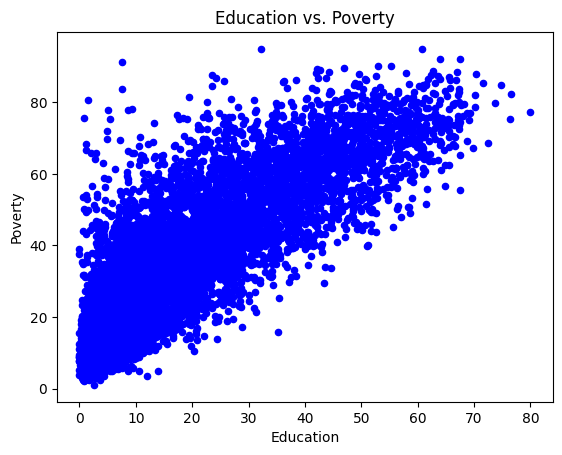

In [ ]:
# I want to further know the detailed Bivariate scatterplots of education and poverty.
df.plot.scatter(x='Education', y='Poverty', color='blue')
plt.xlabel("Education")
plt.ylabel("Poverty")
plt.title("Education vs. Poverty")
plt.show()

I see a very clear positive diagonal plot. Education is highly correlated to poverty rate.

# 5. Do an 90/10 split for X_train, X_test, y_train, y_test where the random seed is equal to your 7 digit studentID number.

In [ ]:
# import train test split
from sklearn.model_selection import train_test_split

In [ ]:
# time to 90/10 split. random seed equal to Chanju's student id.
X_train, X_test, y_train, y_test = train_test_split (X, y,
                                                     test_size = 0.1, # 90/10 split
                                                     shuffle = True,
                                                     random_state = 3058853 # chanju's student id
                                                     )

In [ ]:
# check the shape!
print("The shape of X_train is", X_train.shape)
print("The shape of X_test is", X_test.shape)
print("The shape of y_train is", y_train.shape)
print("The shape of y_test is", y_test.shape)

The shape of X_train is (6849, 35)
The shape of X_test is (761, 35)
The shape of y_train is (6849, 1)
The shape of y_test is (761, 1)


# 6. Use the StandardScaler() on train and apply to test partition. Do not scale the target variable!

In [ ]:
from sklearn.preprocessing import StandardScaler
# learn the range on X_train, and apply scaling to X_test
scaler = StandardScaler() # import the scaler
X_train = scaler.fit_transform(X_train) # learn and apply to train
X_test = scaler.transform(X_test) # simply apply to the test data

# 7. Build a model using the Sequential API
with at least 2 dense layers with the relu activation function, and with dropout in between each dense layer (use a number between 0.1 and 0.5). Compile the model using an appropriate optimizer. Use early stopping with patience of at least 10 and restore the best weights once the model converges. You can choose whatever batch size you would like to.

In [ ]:
# modules for neural nets
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [ ]:
# build a sequential model
model = Sequential()
# this is input layer
model.add(Dense(2, input_shape=(X_train.shape[1],), activation='relu')) # the number of columns of X_train, and # of samples are not defined yet. use 'relu' to recode negative predictions to 0.
# this is hidden layer. I chose 0.1 dropout to process the model faster. 10% of the units are deactivated.
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.1))
# this is the output node
model.add(Dense(1, activation='sigmoid')) # it's a categorical model so I am using 'sigmoid'
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 2)                 72        
                                                                 
 dense_21 (Dense)            (None, 10)                30        
                                                                 
 dropout_10 (Dropout)        (None, 10)                0         
                                                                 
 dense_22 (Dense)            (None, 5)                 55        
                                                                 
 dropout_11 (Dropout)        (None, 5)                 0         
                                                                 
 dense_23 (Dense)            (None, 1)                 6         
                                                                 
Total params: 163 (652.00 Byte)
Trainable params: 163 

In [ ]:
# compile the model to track model evaluation metrics.
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy']) # metrics is not required but nice to see

# 8. Fit the model for 100000 epochs with a batch size of your choice, using X_test and y_test as the validation data.

In [ ]:
# now fit the model with early stopping to stop when there is no improvement, reducing a burden to computer as well.
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', mode='max', # maximize validation accuracy
                   patience=10, # 10 consecutive epochs with no improvement in the monitored metric are tolerated before early stopping is triggered.
                   restore_best_weights=True) # when early stopping is triggered, the model's weights will be restored to the best weights found during training
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100000, # the number of times the entire training dataset is passed forward and backward through the neural network
                    batch_size = 10, # 10 data samples at a time during each training iteration.
                    verbose=1, # show results
                    shuffle=True,
                    callbacks=[es]) # include early stopping into the model

Epoch 1/100000
685/685 [==============================] - 3s 3ms/step - loss: 0.5986 - accuracy: 0.7059 - val_loss: 0.5085 - val_accuracy: 0.8042
Epoch 2/100000
685/685 [==============================] - 2s 2ms/step - loss: 0.4741 - accuracy: 0.8340 - val_loss: 0.4424 - val_accuracy: 0.8279
Epoch 3/100000
685/685 [==============================] - 2s 2ms/step - loss: 0.4401 - accuracy: 0.8365 - val_loss: 0.4120 - val_accuracy: 0.8371
Epoch 4/100000
685/685 [==============================] - 2s 2ms/step - loss: 0.4168 - accuracy: 0.8430 - val_loss: 0.3965 - val_accuracy: 0.8423
Epoch 5/100000
685/685 [==============================] - 2s 3ms/step - loss: 0.4020 - accuracy: 0.8476 - val_loss: 0.3852 - val_accuracy: 0.8449
Epoch 6/100000
685/685 [==============================] - 2s 3ms/step - loss: 0.3932 - accuracy: 0.8502 - val_loss: 0.3777 - val_accuracy: 0.8489
Epoch 7/100000
685/685 [==============================] - 2s 2ms/step - loss: 0.3843 - accuracy: 0.8498 - val_loss: 0.3699 -

# 9. Evaluate the model using learning curves, error metrics and confusion matrices for each partition (like we do in class).
You should largely be able to copy and paste this from class notebooks. Add a few bullet points about what you see (did your model learn nice and gently?  If you don't have text cells here, you will lose points.

In [ ]:
# some modules to evaluate the classification model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

## Learning curves

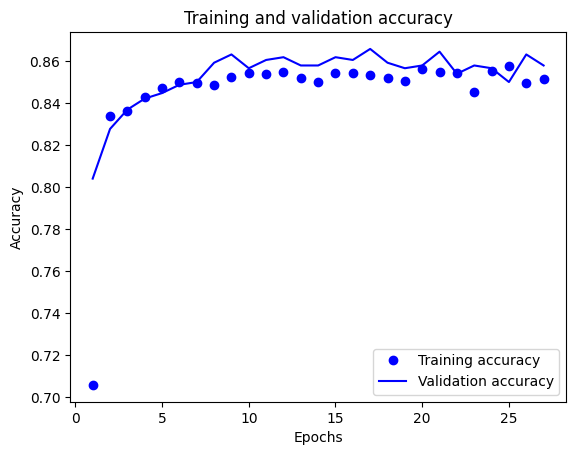

In [ ]:
# learning curve
import matplotlib.pyplot as plt

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

I don't see a dramatic learning curve change. my model learn nice and gently. It didn't overfit over the epochs except for the one time at epoch = 24. But overall, my model didn't overfit.

In [ ]:
# this is the max value of val_acc
np.max(val_acc)

0.8659658432006836

Checking at the verbose, val_acc had the highest accuracy at Epoch = 17

## error metrics

In [ ]:
# see how the model did!
# if I don't round to a whole number (0 or 1), the confusion matrix won't work!
preds_train = np.round(model.predict(X_train),0)
preds_test = np.round(model.predict(X_test),0)
# see accuracy score
print(accuracy_score(y_train, preds_train))
print(accuracy_score(y_test, preds_test))

24/24 [==============================] - 0s 1ms/step
0.874142210541685
0.8659658344283837


Accuracy score for train is 0.874 and test is 0.866

In [ ]:
print("this is the train classification report: \n", classification_report(y_train, preds_train))
print("this is the test classification report: \n", classification_report(y_test, preds_test))

this is the train classification report: 
               precision    recall  f1-score   support

           0       0.88      0.89      0.88      3717
           1       0.87      0.86      0.86      3132

    accuracy                           0.87      6849
   macro avg       0.87      0.87      0.87      6849
weighted avg       0.87      0.87      0.87      6849

this is the train classification report: 
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       407
           1       0.86      0.85      0.85       354

    accuracy                           0.87       761
   macro avg       0.87      0.86      0.87       761
weighted avg       0.87      0.87      0.87       761



Precision and recall seems to be overfitting a bit. but looking at the accuracy and f-1 score, it is the same. The result doesn't seem so bad. The results for train and test is quite similar.

## confusion matrix

In [ ]:
# confusion matrix of train
print("this is the train confusion matrix: \n", confusion_matrix(y_train, preds_train))
# confusion matrix of test
print("this is the train confusion matrix: \n", confusion_matrix(y_test, preds_test)) # order matters! (actual, predicted)

this is the train confusion matrix: 
 [[3300  417]
 [ 445 2687]]
this is the train confusion matrix: 
 [[359  48]
 [ 54 300]]


top left is TN, bottom right is TP, top right is FP, bottom left is FN

for both train and test, misclassified ones (FN and FP) does not take up much (about 13%) compared to the whole classifications.

# 10. Calculate what a baseline prediction would be for the train and test partitions (a mean only model).
Did your model do better than the baseline predictions? If so, you have a useful model!

## y_train

In [ ]:
# make it dataframe again to see the value counts.
y_train = pd.DataFrame(y_train)

In [ ]:
# check the value counts
y_train.value_counts()

0    3717
1    3132
dtype: int64

In [ ]:
# calculate baseline for 0 because it is the majority class. (total accuracy)
3717 / (3717+3132)

0.5427069645203679

Looking above the classification report, the total accuracy for train is 0.87 and baseline for train is 0.54. so my model performed better than the baseline of train partition.

## y_test

In [ ]:
# make it dataframe again to see the value counts.
y_test = pd.DataFrame(y_test)

In [ ]:
# check the value counts
y_test.value_counts()

0    407
1    354
dtype: int64

In [ ]:
# calculate baseline for 0 because it is the majority class. (total accuracy)
407 / (407+354)

0.5348226018396847

Looking above the classification report, the total accuracy for test is 0.87 and baseline for train is 0.53. so my model performed better than the baseline of test partition.